## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Get the data

In [2]:
house_data_df=pd.read_csv('kc_house_data.csv')

In [3]:
house_df=house_data_df.copy()
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data preprocessing

In [4]:
print('Shape of the dataset : ',house_df.shape)

Shape of the dataset :  (21613, 21)


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

'date' column to be converted to 'datetime' datatype <br>
'bathrooms', 'floors' columns to be converted to 'int' datatype

In [6]:
# Converting 'date' column to 'datetime' datatype
house_df['date']=pd.to_datetime(house_df['date'])

In [7]:
# Converting 'price' column to 'int' datatype
house_df['price']=house_df['price'].astype(int)

In [8]:
# Converting 'bathrooms' column to 'int' datatype
house_df['bathrooms']=house_df['bathrooms'].astype(int)

In [9]:
# Converting 'floors' column to 'int' datatype
house_df['floors']=house_df['floors'].astype(int)

In [10]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int32         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int32         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int32         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [12]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
print('Missing values in each column : \n',house_df.isnull().sum())

Missing values in each column : 
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [14]:
print('No of duplicates in the dataset : ',house_df.duplicated().sum())

No of duplicates in the dataset :  0


In [15]:
for i in house_df.columns:
    print(f'The column "{i}" has : \n {house_df[i].value_counts()}')

The column "id" has : 
 795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64
The column "date" has : 
 2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64
The column "price" has : 
 350000     172
450000     172
550000     159
500000     152
425000     150
          ... 
607010       1
1362500      1
298800       1
957500       1
402101       1
Name: price, Length: 4028, dtype: int64
The column "bedrooms" has : 
 3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
The column "bathrooms" has : 
 2    10542
1     8355
3     2228
4 

The no of bedrooms listed as 8,9,10,11,33 have less numbers and so it can be merged to the existing bedrooms

In [16]:
# This replacement is done by referring the pie chart, where the colors got repeated
house_df['bedrooms']=house_df['bedrooms'].replace(8,3)
house_df['bedrooms']=house_df['bedrooms'].replace(9,4)
house_df['bedrooms']=house_df['bedrooms'].replace(10,2)
house_df['bedrooms']=house_df['bedrooms'].replace(11,5)
house_df['bedrooms']=house_df['bedrooms'].replace(33,6)
print(house_df['bedrooms'].value_counts())

house_df['bathrooms']=house_df['bathrooms'].replace(8,3)
print(house_df['bathrooms'].value_counts())

3    9837
4    6888
2    2763
5    1602
6     273
1     199
7      38
0      13
Name: bedrooms, dtype: int64
2    10542
1     8355
3     2230
4      338
0       86
5       48
6       12
7        2
Name: bathrooms, dtype: int64


In [17]:
for i in house_df.columns:
    print(f'The column "{i}" has : \n {house_df[i].value_counts()}')

The column "id" has : 
 795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64
The column "date" has : 
 2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64
The column "price" has : 
 350000     172
450000     172
550000     159
500000     152
425000     150
          ... 
607010       1
1362500      1
298800       1
957500       1
402101       1
Name: price, Length: 4028, dtype: int64
The column "bedrooms" has : 
 3    9837
4    6888
2    2763
5    1602
6     273
1     199
7      38
0      13
Name: bedrooms, dtype: int64
The column "bathrooms" has : 
 2    10542
1     8355
3     2230
4      338
0       86
5       48
6       12
7        2
Name: bath

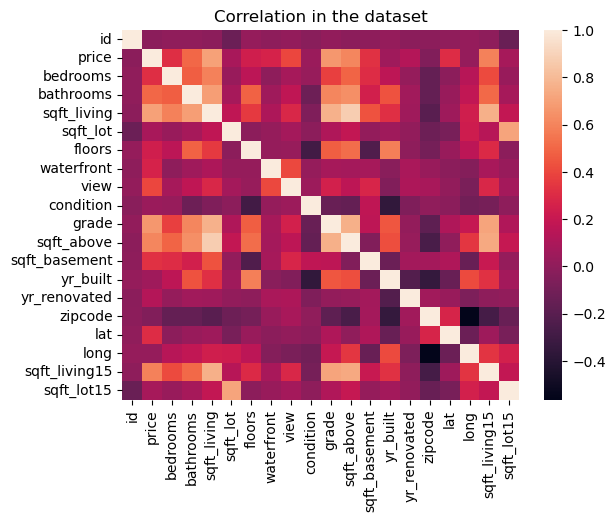

In [18]:
plt.title('Correlation in the dataset',loc='center')
sns.heatmap(house_df.corr())
plt.show()

The variables __'sqft_living'__ and __'sqft_above'__ has high correlation. So, we are dropping 'sqft_above' variable

In [19]:
house_df.drop(columns=['sqft_above'],axis=1,inplace=True)

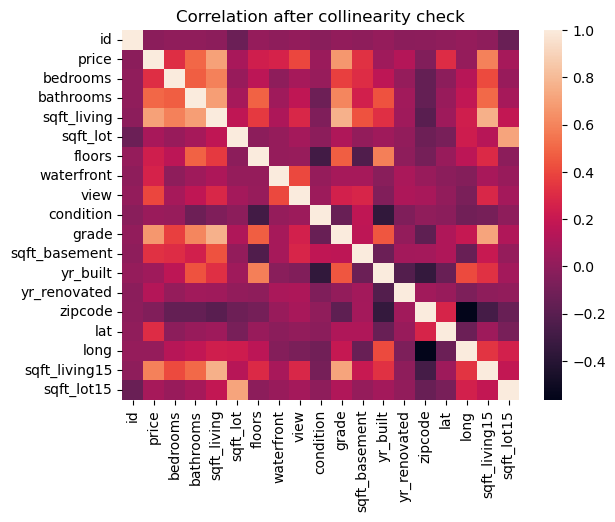

In [20]:
plt.title('Correlation after collinearity check',loc='center')
sns.heatmap(house_df.corr())
plt.show()

## EDA
### Uni-variate analysis

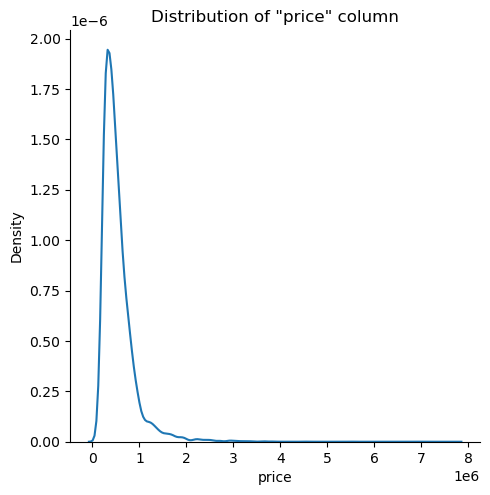

In [21]:
sns.displot(house_df['price'],kind='kde')
plt.title('Distribution of "price" column',loc='center')
plt.show()

The distribution is right-skewed

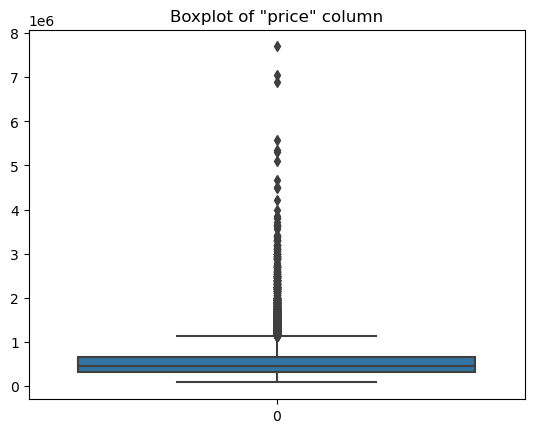

In [22]:
plt.title('Boxplot of "price" column',loc='center')
sns.boxplot(house_df['price'])
plt.show()

Large number of outliers are present in 'price' column

## Outlier treatment and capping

In [23]:
q1=house_df['price'].quantile(0.25)
q3=house_df['price'].quantile(0.75)
print('25th percentile : ',q1)
print('75th percentile : ',q3)
iqr=q3-q1
print('IQR : ',iqr)

25th percentile :  321950.0
75th percentile :  645000.0
IQR :  323050.0


In [24]:
ul=q3 + 1.5 * iqr
ll=q1 - 1.5 * iqr
print('Upper limit : ',ul)
print('Lower limit : ',ll)

Upper limit :  1129575.0
Lower limit :  -162625.0


In [25]:
house_df[house_df['price'] > ul]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000,4,4,5420,101930,1,0,0,3,11,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,2014-08-26,2000000,3,2,3050,44867,1,0,4,3,9,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,2015-03-11,1350000,3,2,2753,65005,1,1,2,5,9,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,2014-06-12,1325000,5,2,3200,20158,1,0,0,3,8,1600,1965,0,98004,47.6303,-122.215,3390,20158
125,4389200955,2015-03-02,1450000,4,2,2750,17789,1,0,0,3,8,770,1914,1992,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,2015-01-30,1700000,4,3,3830,8963,2,0,0,3,10,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,9253900271,2015-01-07,3567000,5,4,4850,10584,2,1,4,3,10,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,7430200100,2014-05-14,1222500,4,3,4910,9444,1,0,0,3,11,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,191100405,2015-04-21,1575000,4,3,3410,10125,2,0,0,3,10,0,2007,0,98040,47.5653,-122.223,2290,10125


In [26]:
house_new_df=house_df[house_df['price'] < ul]
house_new_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


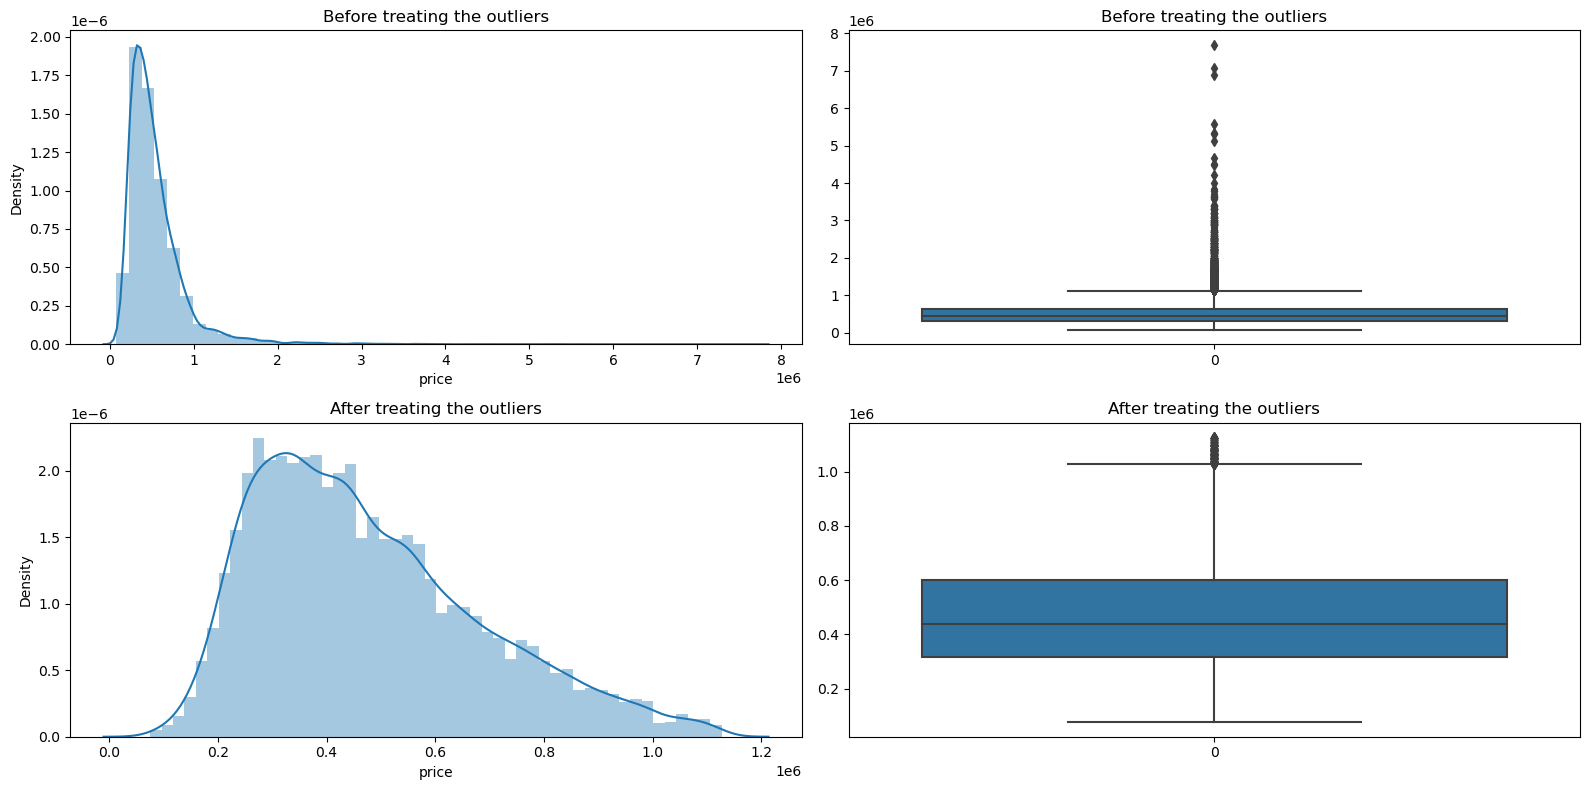

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title('Before treating the outliers',loc='center')
sns.distplot(house_df['price'])
plt.subplot(2,2,2)
plt.title('Before treating the outliers',loc='center')
sns.boxplot(house_df['price'])
plt.subplot(2,2,3)
plt.title('After treating the outliers',loc='center')
sns.distplot(house_new_df['price'])
plt.subplot(2,2,4)
plt.title('After treating the outliers',loc='center')
sns.boxplot(house_new_df['price'])
plt.tight_layout()
plt.show()

In [28]:
house_new_df_cap=house_df.copy()
house_new_df_cap['price'] = np.where(house_new_df_cap['price'] > ul,ul,
np.where(house_new_df_cap['price'] < ll,ll,house_new_df_cap['price']))
house_new_df_cap

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0,1020,1350,2,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


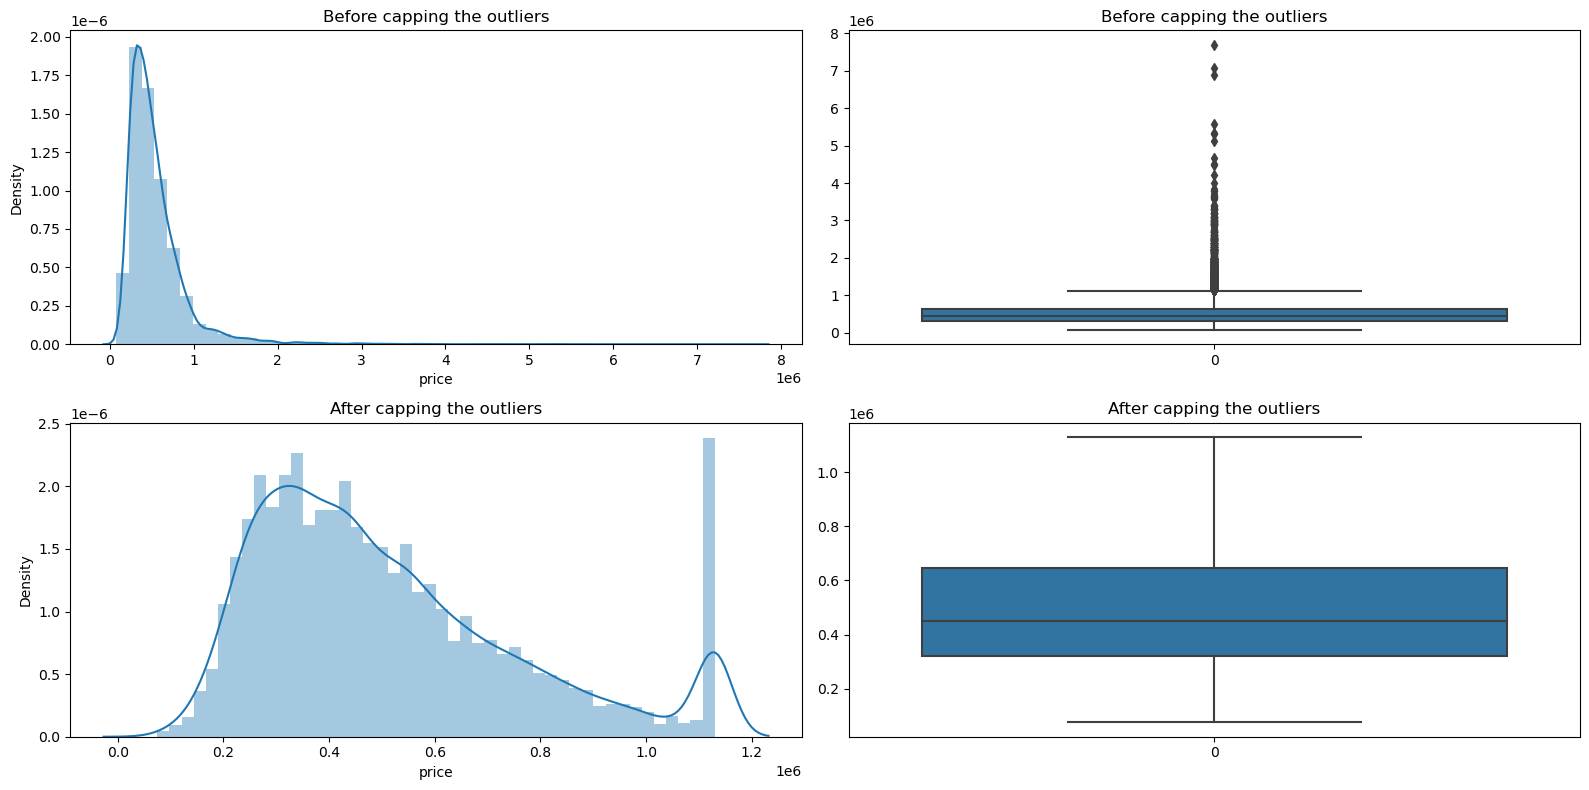

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title('Before capping the outliers',loc='center')
sns.distplot(house_df['price'])
plt.subplot(2,2,2)
plt.title('Before capping the outliers',loc='center')
sns.boxplot(house_df['price'])
plt.subplot(2,2,3)
plt.title('After capping the outliers',loc='center')
sns.distplot(house_new_df_cap['price'])
plt.subplot(2,2,4)
plt.title('After capping the outliers',loc='center')
sns.boxplot(house_new_df_cap['price'])
plt.tight_layout()
plt.show()

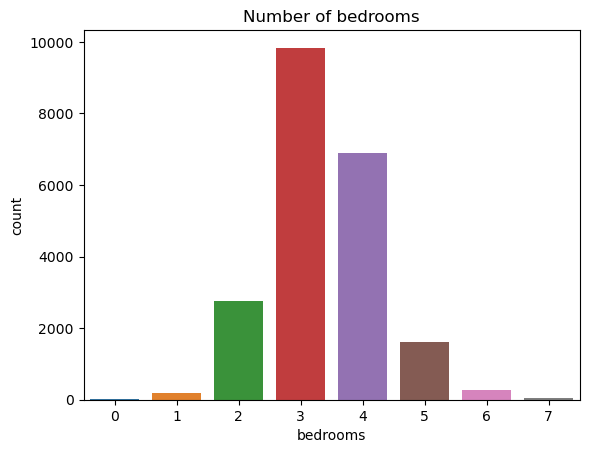

In [30]:
plt.title('Number of bedrooms',loc='center')
sns.countplot(x=house_new_df_cap['bedrooms'])
plt.show()

Triple bedroom houses are more in number

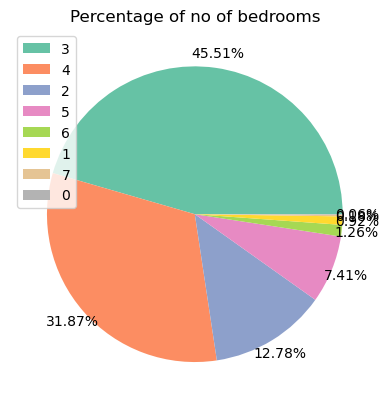

In [31]:
plt.title('Percentage of no of bedrooms',loc='center')
plt.pie(house_new_df_cap['bedrooms'].value_counts(),autopct='%.2f%%',radius=1,
       pctdistance=1.1,labeldistance=1.4,colors=sns.color_palette('Set2'))
plt.legend(house_new_df_cap['bedrooms'].value_counts().index,loc='upper left')
plt.show()

0 and 7 bedrooms are very less in number

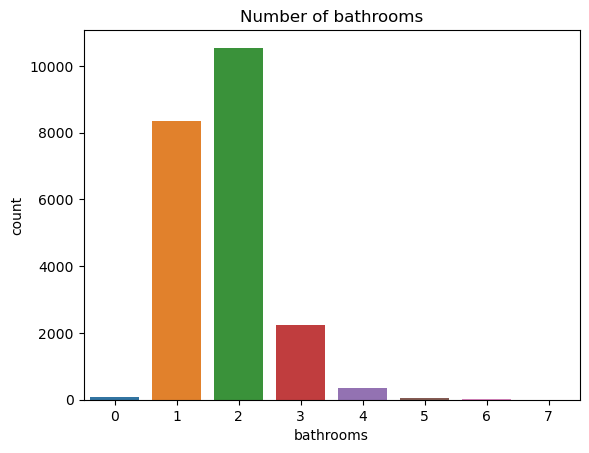

In [32]:
plt.title('Number of bathrooms',loc='center')
sns.countplot(x=house_new_df_cap['bathrooms'])
plt.show()

Houses with 2 bathrooms are more in number

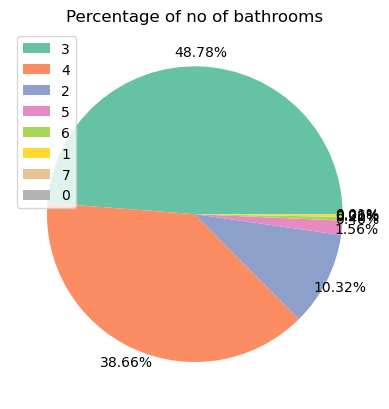

In [33]:
plt.title('Percentage of no of bathrooms',loc='center')
plt.pie(house_new_df_cap['bathrooms'].value_counts(),autopct='%.2f%%',radius=1,
       pctdistance=1.1,labeldistance=1.4,colors=sns.color_palette('Set2'))
plt.legend(house_new_df_cap['bedrooms'].value_counts().index,loc='upper left')
plt.show()

0 and 7 bathrooms are very less in number

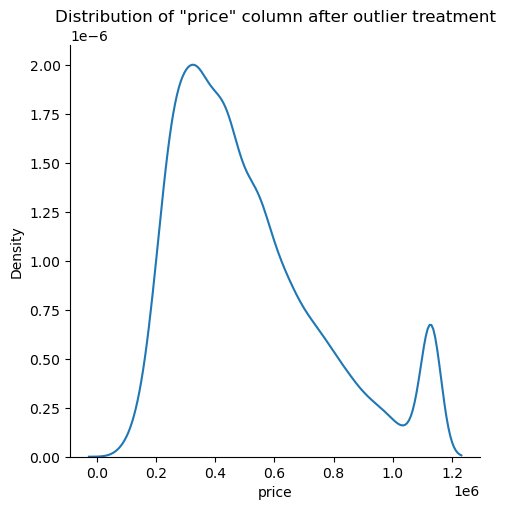

In [34]:
sns.displot(house_new_df_cap['price'],kind='kde')
plt.title('Distribution of "price" column after outlier treatment',loc='center')
plt.show()

The distribution of 'price' column is almost normally distributed after outlier treatment

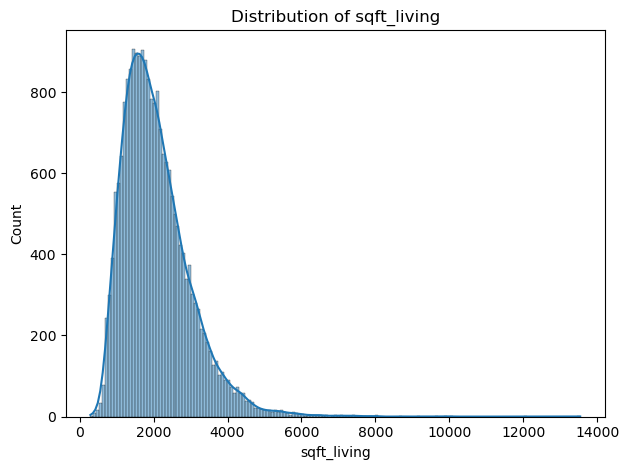

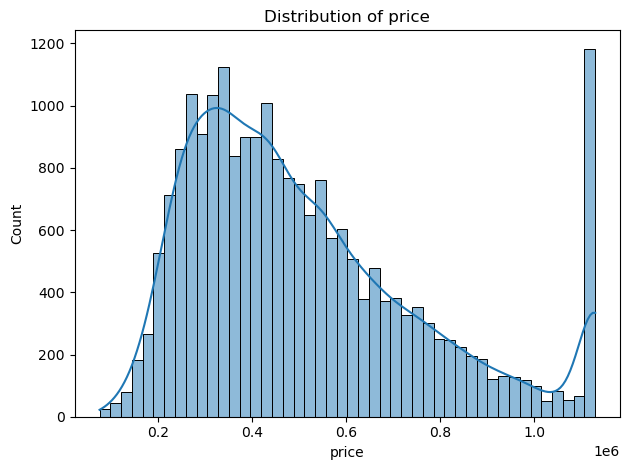

In [35]:
house_new_imp_cols1=pd.DataFrame(data=house_new_df_cap,columns=['sqft_living','price'])
for col in house_new_imp_cols1.columns:
    plt.title(f'Distribution of {col}',loc='center')
    sns.histplot(house_new_df_cap,x=house_new_df_cap[col],kde=True)
    plt.tight_layout()
    plt.show()

'sqft_living' column is right skewed whereas 'price' column is almost normally distributed

### Bivariate analysis

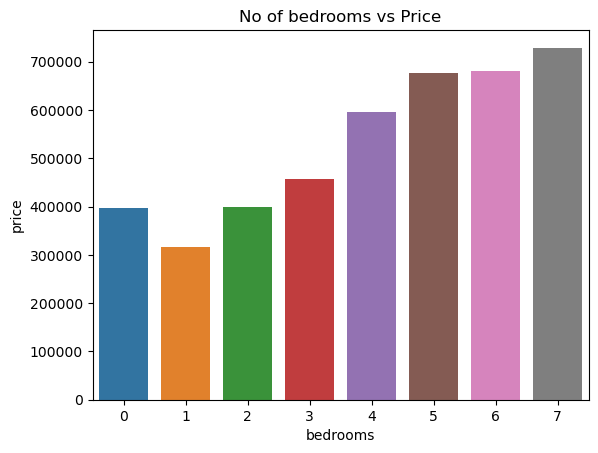

In [36]:
plt.title('No of bedrooms vs Price',loc='center')
sns.barplot(x='bedrooms',y='price',data=house_new_df_cap,ci=None)
plt.show()

In spite of no bedrooms, the price of the house is high

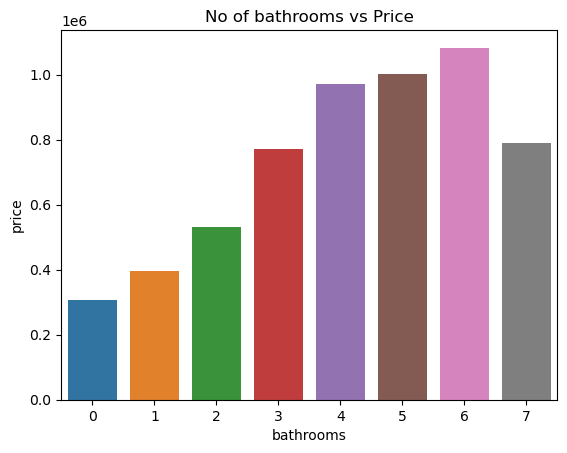

In [37]:
plt.title('No of bathrooms vs Price',loc='center')
sns.barplot(x='bathrooms',y='price',data=house_new_df_cap,ci=None)
plt.show()

In spite of having 7 bathrooms, the price of the house is low

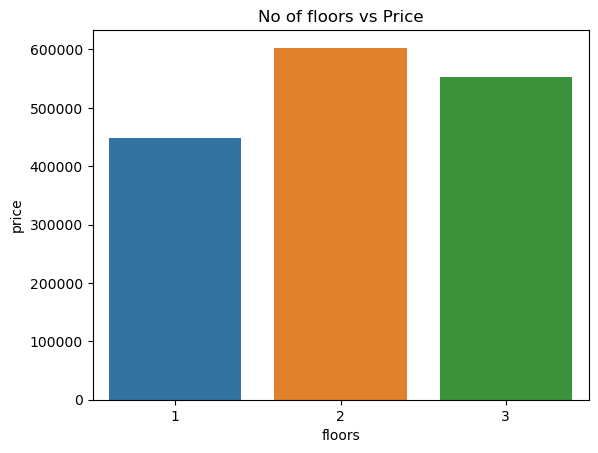

In [38]:
plt.title('No of floors vs Price',loc='center')
sns.barplot(x='floors',y='price',data=house_new_df_cap,ci=None)
plt.show()

There is no much price difference for houses having 2 floors and 3 floors

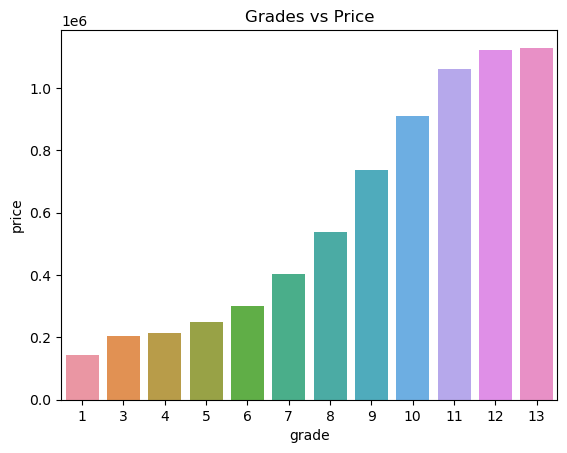

In [39]:
plt.title('Grades vs Price',loc='center')
sns.barplot(x='grade',y='price',data=house_new_df_cap,ci=None)
plt.show()

As the grade increases, the price also increases

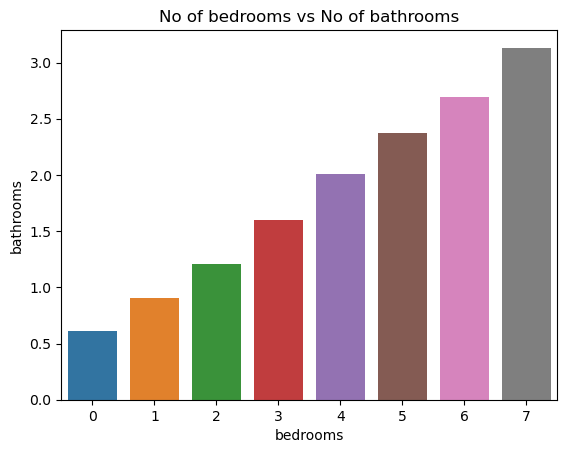

In [40]:
plt.title('No of bedrooms vs No of bathrooms',loc='center')
sns.barplot(x='bedrooms',y='bathrooms',data=house_new_df_cap,ci=None)
plt.show()

As the No of bedrooms increases, the No of bathrooms also increases

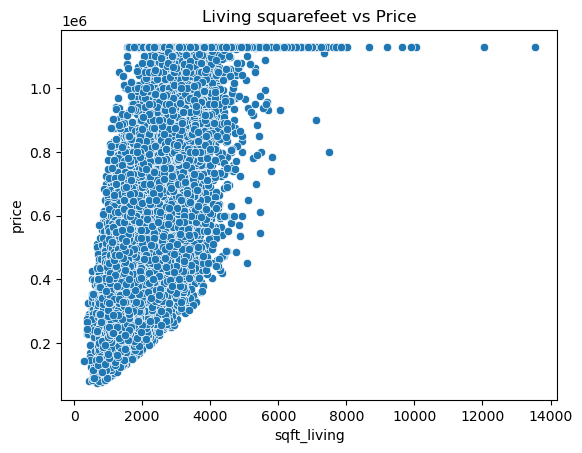

In [41]:
plt.title('Living squarefeet vs Price',loc='center')
sns.scatterplot(house_new_df_cap,x=house_new_df_cap['sqft_living'],y=house_new_df_cap['price'])
plt.show()

 Even small houses(in sqft) have high prices

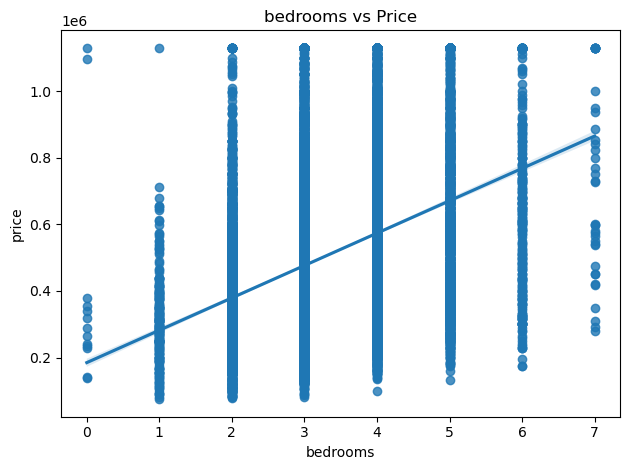

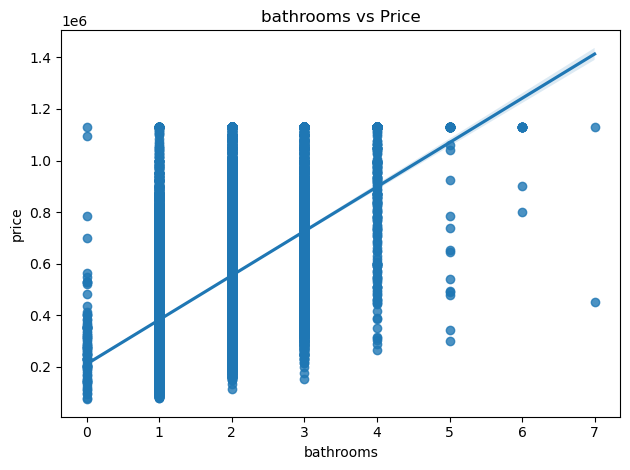

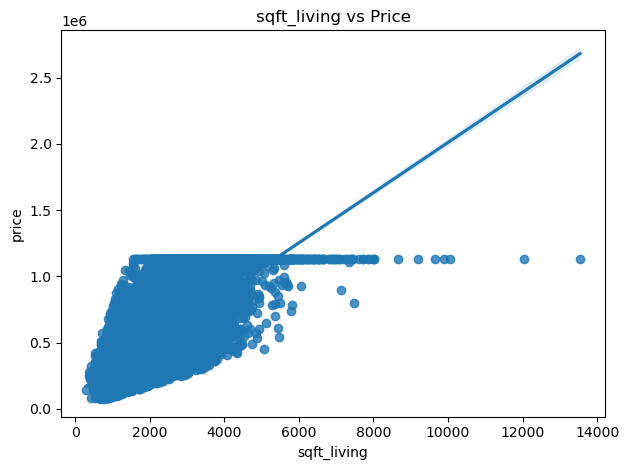

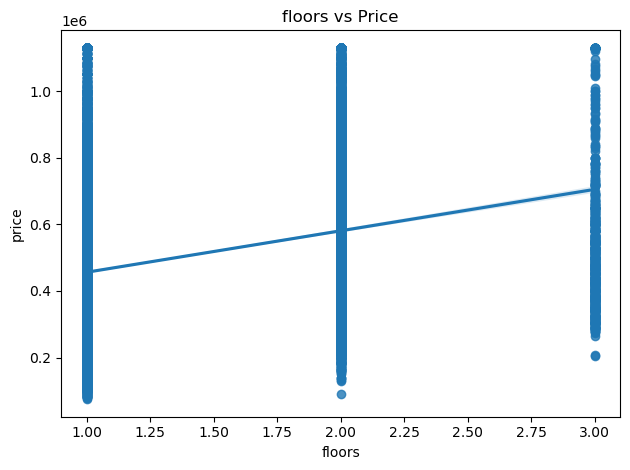

In [42]:
house_new_imp_cols=pd.DataFrame(data=house_new_df_cap,columns=['bedrooms','bathrooms',
                                                                 'sqft_living','floors'])
for col in house_new_imp_cols.columns:
    plt.title(f'{col} vs Price',loc='center')
    sns.regplot(house_new_df_cap,x=house_new_df_cap[col],y=house_new_df_cap['price'])
    plt.tight_layout()
    plt.show()

The columns 'bedrooms','bathrooms','floors' and 'sqft_living' has increasing trend throughout

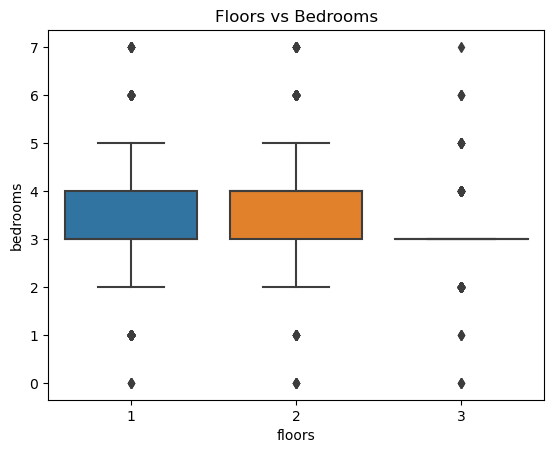

In [43]:
plt.title('Floors vs Bedrooms',loc='center')
sns.boxplot(x='floors',y='bedrooms',data=house_new_df_cap)
plt.show()

3 floors with respect to bedrooms has many outliers

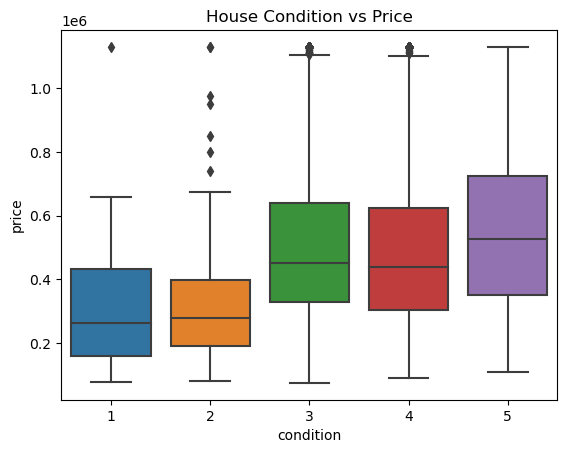

In [44]:
plt.title('House Condition vs Price',loc='center')
sns.boxplot(x='condition',y='price',data=house_new_df_cap)
plt.show()

Houses with condition 5 are perfect with no outliers

### Multivariate analysis

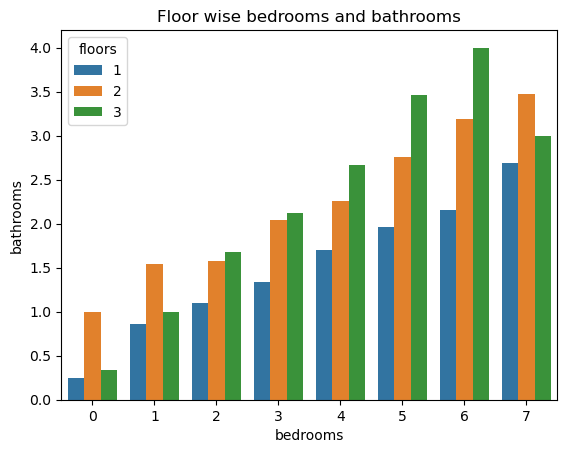

In [45]:
plt.title('Floor wise bedrooms and bathrooms',loc='center')
sns.barplot(x='bedrooms',y='bathrooms',data=house_new_df_cap,hue='floors',ci=None)
plt.show()

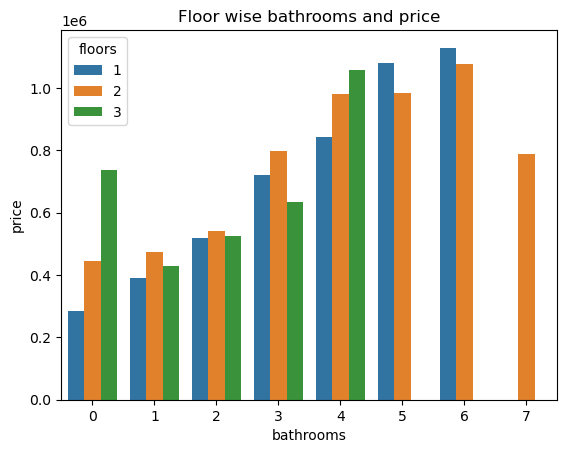

In [46]:
plt.title('Floor wise bathrooms and price',loc='center')
sns.barplot(x='bathrooms',y='price',data=house_new_df_cap,hue='floors',ci=None)
plt.show()

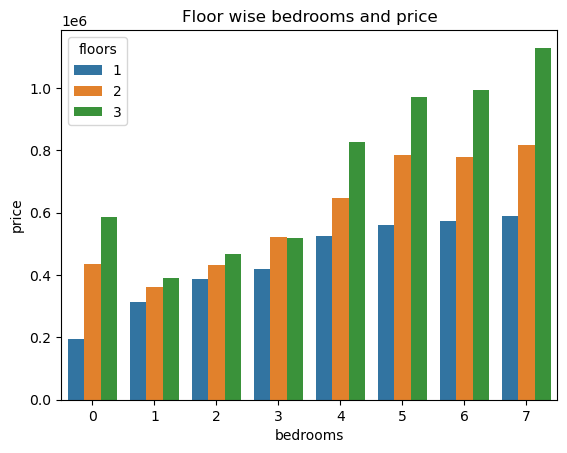

In [47]:
plt.title('Floor wise bedrooms and price',loc='center')
sns.barplot(x='bedrooms',y='price',data=house_new_df_cap,hue='floors',ci=None)
plt.show()

## Train test split

In [48]:
x=house_new_df_cap[['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
                  'view','condition','grade','sqft_basement','yr_built','yr_renovated',
                  'zipcode','sqft_living15','sqft_lot15']]
x.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,3,1,1180,5650,1,0,0,3,7,0,1955,0,98178,1340,5650
1,6414100192,3,2,2570,7242,2,0,0,3,7,400,1951,1991,98125,1690,7639
2,5631500400,2,1,770,10000,1,0,0,3,6,0,1933,0,98028,2720,8062
3,2487200875,4,3,1960,5000,1,0,0,5,7,910,1965,0,98136,1360,5000
4,1954400510,3,2,1680,8080,1,0,0,3,8,0,1987,0,98074,1800,7503


In [49]:
y=house_new_df_cap[['price']]
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
6325,5467910190,3,1,1780,13095,1,0,0,4,9,0,1983,0,98042,2750,13095
13473,9331800580,2,1,1000,3700,1,0,0,3,6,200,1929,0,98118,1270,5000
17614,2407000405,3,1,1080,7486,1,0,0,3,6,90,1942,0,98146,1170,7800
16970,5466700290,3,2,2090,7500,1,0,0,4,7,810,1977,0,98031,1800,7350
20868,3026059361,2,2,1741,1439,2,0,0,3,8,295,2007,0,98034,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,3,1,1000,6914,1,0,0,3,7,0,1947,0,98125,1000,6947
21575,9578500790,3,2,3087,5002,2,0,0,3,8,0,2014,0,98023,2927,5183
5390,7202350480,3,2,2120,4780,2,0,0,3,7,0,2004,0,98053,1690,2650
860,1723049033,1,0,380,15000,1,0,0,3,5,0,1963,0,98168,1170,15000


In [52]:
x_test

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
735,2591820310,4,2,2070,8893,2,0,0,4,8,0,1986,0,98058,2390,7700
2830,7974200820,5,3,2900,6730,1,0,0,5,8,1070,1977,0,98115,2370,6283
4106,7701450110,4,2,3770,10893,2,0,2,3,11,0,1997,0,98006,3710,9685
16218,9522300010,3,3,4560,14608,2,0,2,3,12,0,1990,0,98034,4050,14226
19964,9510861140,3,2,2550,5376,2,0,0,3,9,0,2004,0,98052,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,6163900333,3,1,1250,7710,1,0,0,4,7,0,1947,0,98155,1340,7710
20377,3528960020,3,2,2830,3496,2,0,0,3,8,0,2012,0,98029,2160,3501
8805,1687000220,4,2,2434,4400,2,0,0,3,8,0,2007,0,98001,2434,4400
10168,4141400030,4,1,2250,10108,1,0,0,4,8,0,1967,0,98008,2050,9750


In [53]:
y_train

,price
6325,325000.0
13473,257000.0
17614,228500.0
16970,288000.0
20868,479000.0
...,...
11964,378000.0
21575,399950.0
5390,575000.0
860,245000.0


In [54]:
y_test

,price
735,365000.0
2830,865000.0
4106,1038000.0
16218,1129575.0
19964,711000.0
...,...
13674,338000.0
20377,673000.0
8805,285000.0
10168,605000.0


## Model building

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

In [58]:
num=1
r2_scores_all_models=pd.DataFrame(columns=['Training_R2', 'Testing_R2'])
# results=[]
def model_building(model):
    global num
    print(f'Model-{num} : {model}\n')
    mdl=model.fit(x_train,y_train)
    mdl_pred_train=mdl.predict(x_train)
    mdl_pred_test=mdl.predict(x_test)
    
    train_mae=mean_absolute_error(y_train,mdl_pred_train)
    print("Train MAE : ",train_mae)
    test_mae=mean_absolute_error(y_test,mdl_pred_test)
    print("Test MAE : ",test_mae)
    print()

    train_mse=mean_squared_error(y_train,mdl_pred_train)
    print("Train MSE : ",train_mse)
    test_mse=mean_squared_error(y_test,mdl_pred_test)
    print("Test MSE : ",test_mse)
    print()
    
    train_rmse=np.sqrt(train_mse)
    print("Train RMSE : ",train_rmse)
    test_rmse=np.sqrt(test_mse)
    print("Test RMSE : ",test_rmse)
    print()
    
    train_r2=r2_score(y_train,mdl_pred_train)
    print("Train r2_score : ",train_r2)
    test_r2=r2_score(y_test,mdl_pred_test)
    print("Test r2_score : ",test_r2)
    print()
    num+=1
#     results.append({'Training r2_score': train_r2,'Testing r2_score': test_r2})
#     global r2_scores_all_models
#     r2_scores_all_models=pd.DataFrame(results)
    
    res=pd.DataFrame({'Training r2_score':[train_r2],'Testing r2_score':[test_r2]})
    global r2_scores_all_models
    r2_scores_all_models=pd.concat([r2_scores_all_models,res],ignore_index=True)

In [59]:
model_building(LinearRegression())

Model-1 : LinearRegression()

Train MAE :  111085.00595705991
Test MAE :  113776.5937296051

Train MSE :  20847610165.870037
Test MSE :  21955534585.794125

Train RMSE :  144387.0152259892
Test RMSE :  148174.00104537274

Train r2_score :  0.6641547252749807
Test r2_score :  0.6578134159138935



In [60]:
model_building(Ridge())

Model-2 : Ridge()

Train MAE :  111085.63948606321
Test MAE :  113775.36737442462

Train MSE :  20847614667.414066
Test MSE :  21955435446.536

Train RMSE :  144387.03081445393
Test RMSE :  148173.66650837794

Train r2_score :  0.6641546527572062
Test r2_score :  0.6578149610424785



In [61]:
model_building(Lasso())

Model-3 : Lasso()

Train MAE :  111085.16459979521
Test MAE :  113776.34632427341

Train MSE :  20847610333.70016
Test MSE :  21955495759.74761

Train RMSE :  144387.0158071707
Test RMSE :  148173.8700302709

Train r2_score :  0.6641547225713156
Test r2_score :  0.6578140210347654



In [62]:
model_building(DecisionTreeRegressor())

Model-4 : DecisionTreeRegressor()

Train MAE :  948.77998843262
Test MAE :  97324.75179273653

Train MSE :  100466614.42469636
Test MSE :  22152536624.43338

Train RMSE :  10023.303568419764
Test RMSE :  148837.28237385073

Train r2_score :  0.9983815297075445
Test r2_score :  0.6547430532043659



In [63]:
model_building(RandomForestRegressor())

Model-5 : RandomForestRegressor()

Train MAE :  26107.89173700873
Test MAE :  71022.44618561295

Train MSE :  1476077539.2006507
Test MSE :  10951112532.667667

Train RMSE :  38419.75454373246
Test RMSE :  104647.56343397427

Train r2_score :  0.9762210794079483
Test r2_score :  0.8293221340226109



In [64]:
model_building(KNeighborsRegressor())

Model-6 : KNeighborsRegressor()

Train MAE :  96204.02030075189
Test MAE :  126135.50460328475

Train MSE :  19806007324.379368
Test MSE :  34154332120.40545

Train RMSE :  140733.81727353012
Test RMSE :  184808.90703752742

Train r2_score :  0.680934461161806
Test r2_score :  0.46768983490905947



In [65]:
model_building(svm.SVR())

Model-7 : SVR()

Train MAE :  192444.9145654581
Test MAE :  196793.20905080246

Train MSE :  65719464003.3243
Test MSE :  68573931701.00632

Train RMSE :  256358.0777025064
Test RMSE :  261866.24773155918

Train r2_score :  -0.05870990810789456
Test r2_score :  -0.06875463926548697



In [66]:
model_building(GaussianProcessRegressor())

Model-8 : GaussianProcessRegressor()

Train MAE :  917.7588706498527
Test MAE :  512683.9326052614

Train MSE :  98490747.69681898
Test MSE :  328373125462.0812

Train RMSE :  9924.250485392788
Test RMSE :  573038.502600027

Train r2_score :  0.9984133599988232
Test r2_score :  -4.117838405094059



In [67]:
model_building(XGBRegressor())

Model-9 : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train MAE :  40339.92420971298
Test MAE :  61751.679340518735

Train MSE :  3044476514.9339557
Test MSE :  7743261473.047931

Train RMSE :  55176.77514075968
Test RMSE :  87995.80372408636

Train r2_score :  0.9509549035396982
Test r2_score :

In [68]:
model_building(GradientBoostingRegressor())

Model-10 : GradientBoostingRegressor()

Train MAE :  79650.75701841025
Test MAE :  82505.73078780778

Train MSE :  11183369972.222641
Test MSE :  12396303876.09114

Train RMSE :  105751.45375938168
Test RMSE :  111338.68993342404

Train r2_score :  0.8198411265948621
Test r2_score :  0.8067981965058784



In [69]:
model_building(AdaBoostRegressor())

Model-11 : AdaBoostRegressor()

Train MAE :  140782.11096230152
Test MAE :  141707.51025337153

Train MSE :  28600687667.45186
Test MSE :  29141307467.56342

Train RMSE :  169117.37837209948
Test RMSE :  170708.25248816595

Train r2_score :  0.5392562634001565
Test r2_score :  0.5458200109333482



#### Stacking model

In [81]:
estimator_models_stack=[('Linear_regression',LinearRegression()),
                        ('Random_forest',RandomForestRegressor()),
                        ('Gradient_boosting',GradientBoostingRegressor()),
                        ('XGboost',XGBRegressor())]

In [82]:
stack_model=StackingRegressor(estimators=estimator_models_stack,final_estimator=XGBRegressor(),
                              cv=10,n_jobs=-1)
stack_model.fit(x_train,y_train)
stack_model_pred_train=stack_model.predict(x_train)
stack_model_pred_test=stack_model.predict(x_test)

print("Train MAE\n",mean_absolute_error(y_train,stack_model_pred_train))
print("Test MAE\n",mean_absolute_error(y_test,stack_model_pred_test))
print()

print("Train RMSE\n",np.sqrt(mean_squared_error(y_train,stack_model_pred_train)))
print("Test RMSE\n",np.sqrt(mean_squared_error(y_test,stack_model_pred_test)))
print()

print("Train r2 score\n",r2_score(y_train,stack_model_pred_train))
print("Test r2 score\n",r2_score(y_test,stack_model_pred_test))
print()

Train MAE
 41410.89708104396
Test MAE
 62941.28573907009

Train RMSE
 61396.05769420881
Test RMSE
 91763.29909534278

Train r2 score
 0.9392755016395812
Test r2 score
 0.8687627865573775



#### Voting model

In [84]:
estimator_models_vote=[('Linear_regression',LinearRegression()),
                       ('Decision_tree',DecisionTreeRegressor()),
                       ('Random_forest',RandomForestRegressor()),
                       ('Gradient_boosting',GradientBoostingRegressor()),
                       ('KNN_regression',KNeighborsRegressor()),
                       ('XGboost',XGBRegressor()),
                       ('Adaboost',AdaBoostRegressor())]

In [85]:
vote_model=VotingRegressor(estimators=estimator_models_vote)

vote_model.fit(x_train,y_train)
vote_model_pred_train=vote_model.predict(x_train)
vote_model_pred_test=vote_model.predict(x_test)

print("Train MAE\n",mean_absolute_error(y_train,vote_model_pred_train))
print("Test MAE\n",mean_absolute_error(y_test,vote_model_pred_test))
print()

print("Train RMSE\n",np.sqrt(mean_squared_error(y_train,vote_model_pred_train)))
print("Test RMSE\n",np.sqrt(mean_squared_error(y_test,vote_model_pred_test)))
print()

print("Train r2 score\n",r2_score(y_train,vote_model_pred_train))
print("Test r2 score\n",r2_score(y_test,vote_model_pred_test))
print()

Train MAE
 58417.179597046
Test MAE
 78759.14940233417

Train RMSE
 74972.28450304961
Test RMSE
 105393.01128263987

Train r2 score
 0.9094508341491011
Test r2 score
 0.8268818553402542



In [74]:
model_names=['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree Regression',
            'Random Forest Regression','K Neighbors Regression','SVM Regression','Gausian Regression',
            'XGBoost Regression','Gradient Boost Regression','Adaboost Regression']
r2_scores_all_models.index=model_names
r2_scores_all_models.drop(['Training_R2','Testing_R2'],axis=1,inplace=True)
r2_scores_all_models

,Training r2_score,Testing r2_score
Linear Regression,0.664155,0.657813
Ridge Regression,0.664155,0.657815
Lasso Regression,0.664155,0.657814
Decision Tree Regression,0.998382,0.654743
Random Forest Regression,0.976221,0.829322
K Neighbors Regression,0.680934,0.467690
SVM Regression,-0.058710,-0.068755
Gausian Regression,0.998413,-4.117838
XGBoost Regression,0.950955,0.879318
Gradient Boost Regression,0.819841,0.806798
